In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [9]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [11]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

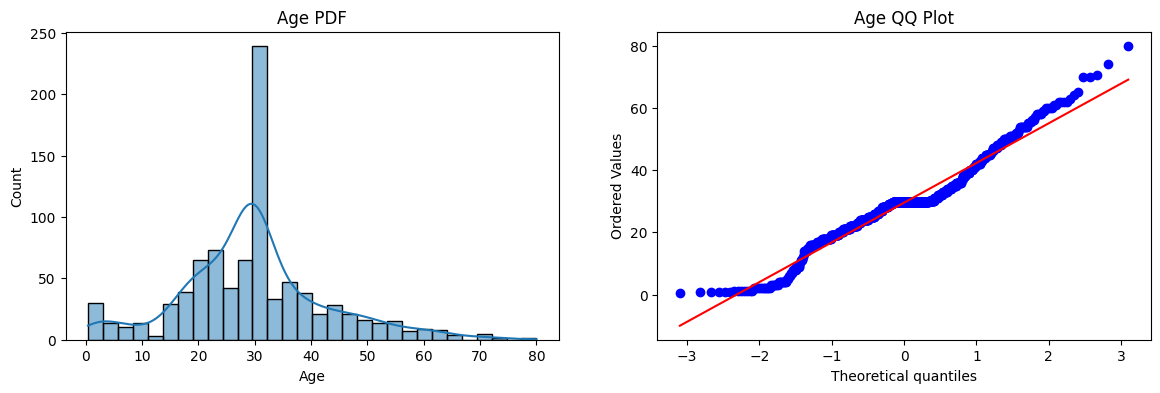

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
#sns.distplot(X_train['Age'])
sns.histplot(df["Age"], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age QQ Plot")

plt.show()

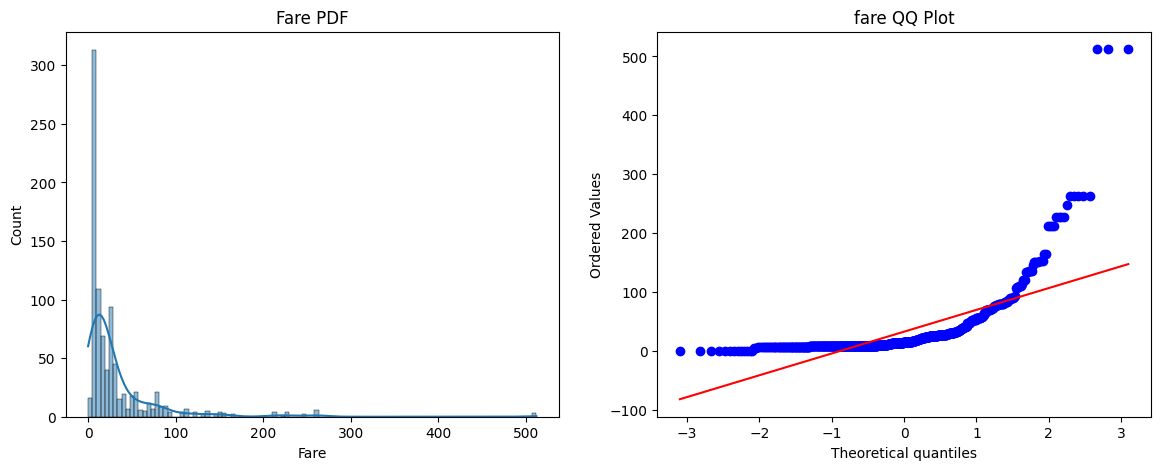

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(121)
#sns.distplot(X_train['Age'])
sns.histplot(df["Fare"], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("fare QQ Plot")

plt.show()

In [25]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [26]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6536312849162011


In [ ]:
# its works on whole dataset
trf=FunctionTransformer(func=np.log1p)

In [ ]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)

In [28]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [31]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6983240223463687


# cross val score

In [36]:
X_transformed=trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

cross1=cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)
cross2=cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)

print('LR ',np.mean(cross1))
print('DT ',np.mean(cross2))

LR  0.678027465667915
DT  0.6610861423220975


# QQplot

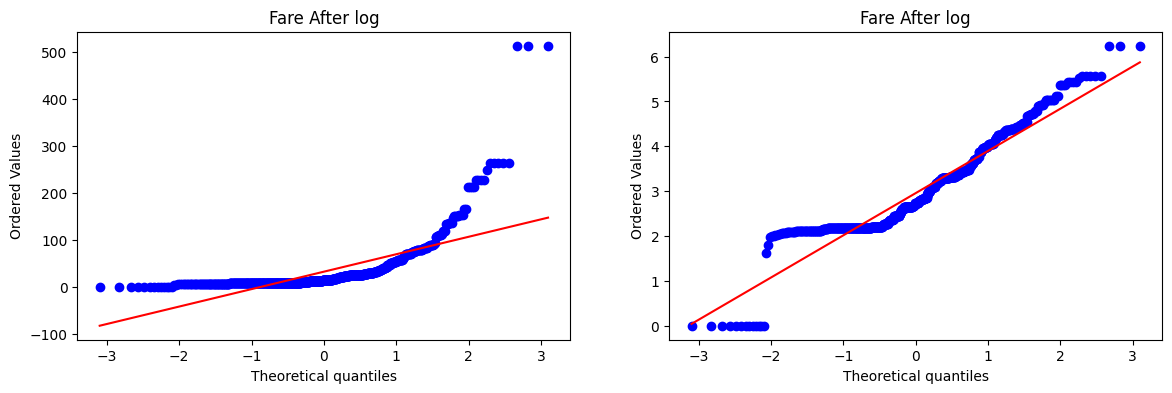

In [38]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare After log")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title("Fare After log")
plt.show()

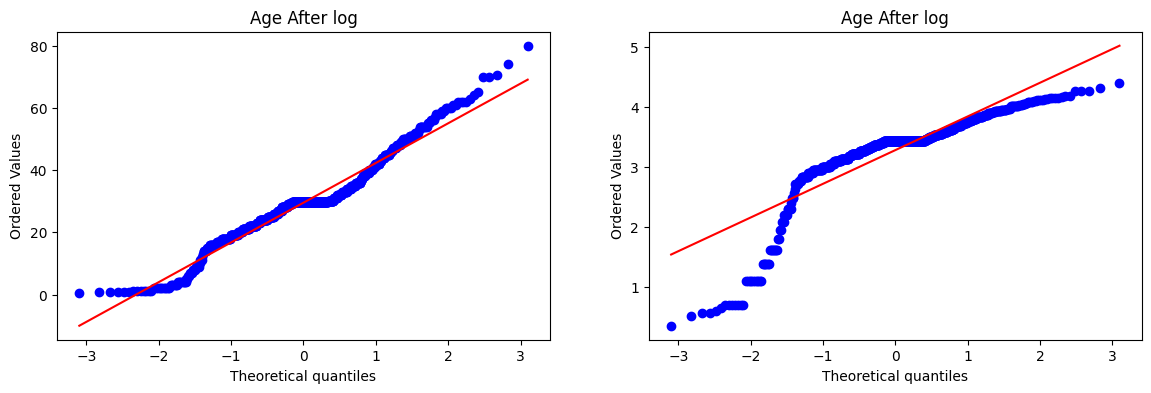

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age After log")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title("Age After log")
plt.show()

In [41]:
# columnTransformer on Fare column only 
trf2=ColumnTransformer(transformers=[
    ('trf2',FunctionTransformer(),['Fare'])
],remainder='passthrough')

In [42]:
X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.fit_transform(X_test)

In [43]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [44]:
X_transformed2=trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

cross1=cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)
cross2=cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)

print('LR ',np.mean(cross1))
print('DT ',np.mean(cross2))

LR  0.6589013732833957
DT  0.6577278401997503


# Other transformers

In [45]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

# square transform

Accuracy 0.6431335830212235


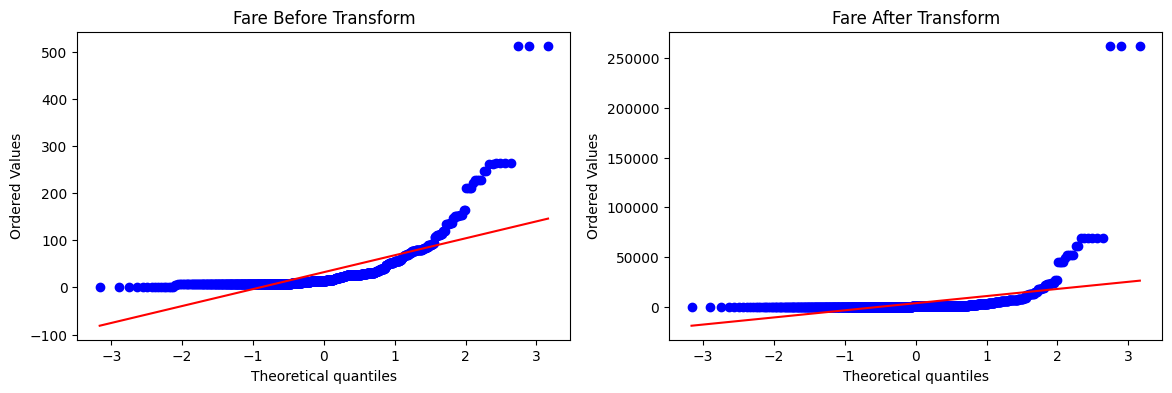

In [47]:
apply_transform(lambda x:x**2)

# reciprocal

Accuracy 0.61729088639201


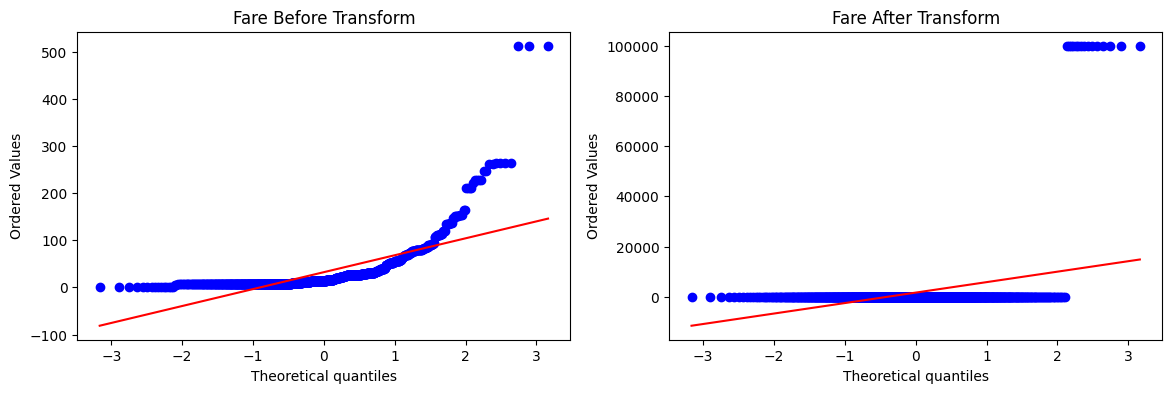

In [49]:
apply_transform(lambda x:1/(x+0.00001))

# squareRoot transformer

Accuracy 0.6611485642946316


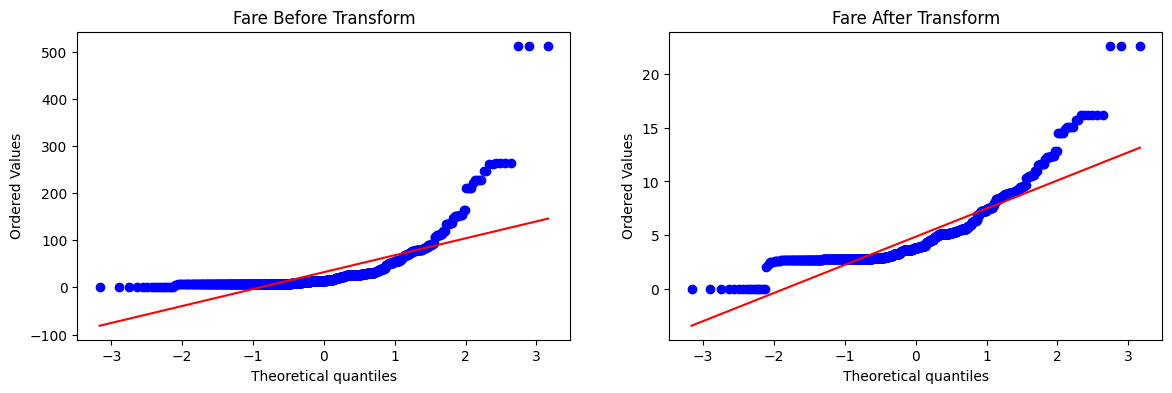

In [50]:
apply_transform(lambda x:x**0.5)